In [1]:
%reset -f

import os
import numpy as np
import pandas as pd
import random
import math
from math import e

import matplotlib
import matplotlib.pyplot as plt
import configparser

from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter

In [2]:
#lectura de datos
solini = pd.read_csv("solini.csv", sep=',', decimal='.')
solfin = pd.read_csv("solfin.csv", sep=',', decimal='.')
avance = pd.read_csv("avance.csv", sep=',', decimal='.')
control = pd.read_csv("control.csv", sep=',', decimal='.')
precioKVAbod = 65560
micolor=['skyblue','indianred']
milabel=['sol inicial', 'sol final']

#cálculos
bodini = solini[solini.id_n == 999999]
bodfin = solfin[solfin.id_n == 999999]

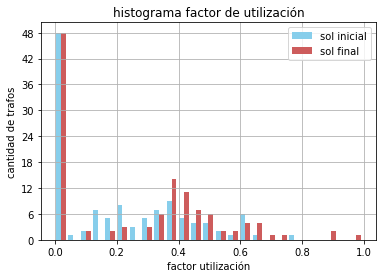

In [3]:
# histograma factor de utilización
fig, ax = plt.subplots()
plt.hist([solini['futi_nt'],solfin['futi_nt']], bins=25, color=micolor,label=milabel)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('cantidad de trafos')
plt.xlabel('factor utilización')
plt.title('histograma factor de utilización')
plt.legend(loc='upper right')
plt.grid(True)

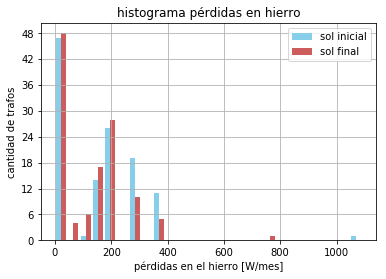

In [4]:
# histograma pérdidas en hierro
fig, ax = plt.subplots()
plt.hist([solini['pfeW'], solfin['pfeW']], bins=25, color=micolor, label=milabel)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('cantidad de trafos')
plt.xlabel('pérdidas en el hierro [W/mes]')
plt.title('histograma pérdidas en hierro')
plt.legend(loc='upper right')
plt.grid(True)

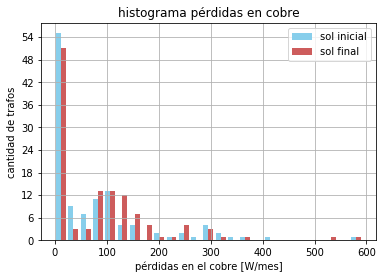

In [5]:
# histograma pérdidas en cobre
fig, ax = plt.subplots()
plt.hist([solini['pcuW'],solfin['pcuW']], bins=25, color=micolor, label=milabel)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('cantidad de trafos')
plt.xlabel('pérdidas en el cobre [W/mes]')
plt.title('histograma pérdidas en cobre')
plt.legend(loc='upper right')
plt.grid(True)

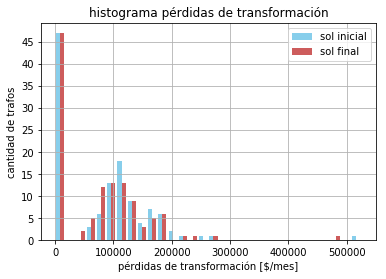

In [6]:
# histograma pérdidas totales - solini
fig, ax = plt.subplots()
plt.hist([solini['cpt_nt'],solfin['cpt_nt']], bins=30, label=['sol inicial', 'sol final'],color=micolor)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('cantidad de trafos')
plt.xlabel('pérdidas de transformación [$/mes]')
plt.title('histograma pérdidas de transformación')
plt.legend(loc='upper right')
plt.grid(True)

trafos en bodega - solución inicial: 47 trafos
trafos en bodega - solución final: 47 trafos
capacidad total instalada en bodega - solución inicial: 5087.5 KVA
capacidad total instalada en bodega - solución final: 6227.5 KVA
capacidad liberada en bodega: 1140.0 KVA
valor de la capacidad liberada en bodega: 74738400 $Col


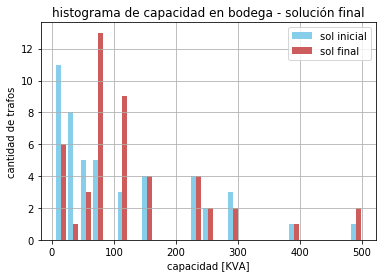

In [7]:
fig, ax = plt.subplots()
plt.hist([bodini['capa_t'], bodfin['capa_t']], bins=25, label=['sol inicial', 'sol final'],color=micolor)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('cantidad de trafos')
plt.xlabel('capacidad [KVA]')
plt.title('histograma de capacidad en bodega - solución final')
plt.legend(loc='upper right')
plt.grid(True)

#cálculo de la capacidad instalada en bodega - inicial y final
capbodini = bodini['capa_t'].sum()
capbodfin = bodfin['capa_t'].sum()
tfbodini = bodini['capa_t'].count()
tfbodfin = bodfin['capa_t'].count()
caplib = capbodfin - capbodini
valorlib = int(caplib * precioKVAbod)

#cálculo de la capacidad instalada en bodega - inicial

print('trafos en bodega - solución inicial: ' + str(tfbodini) + ' trafos')
print('trafos en bodega - solución final: ' + str(tfbodini) + ' trafos')
print('capacidad total instalada en bodega - solución inicial: ' + str(capbodini) + ' KVA')
print('capacidad total instalada en bodega - solución final: ' + str(capbodfin) + ' KVA')
print('capacidad liberada en bodega: ' + str(caplib) + ' KVA')
print('valor de la capacidad liberada en bodega: ' + str(valorlib) + ' $Col')

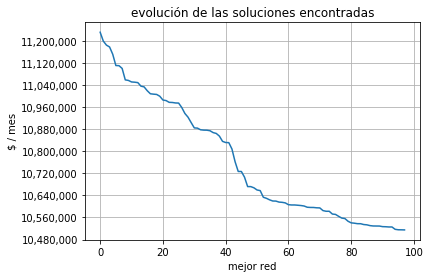

In [8]:
#avance
ax = avance.plot(y='csol')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
ax.legend_.remove()
plt.ylabel('$ / mes')
plt.xlabel('mejor red')
plt.title('evolución de las soluciones encontradas')
plt.grid(True)

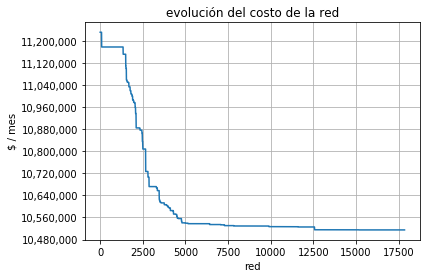

In [9]:
#control
ax = control.plot(x='parejas', y='csol')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
ax.legend_.remove()
plt.ylabel('$ / mes')
plt.xlabel('red')
plt.title('evolución del costo de la red')
plt.grid(True)